In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the house rental data

data = pd.read_csv("house_rental_data.csv")

In [3]:
data.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
data.shape

(645, 8)

we have a data of 645 houses and 8 features to choose from.

In [5]:
# checking for null values
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

There are no null values. Phew!

In [6]:
#lets check the average price of the house
print("the average price of the house is ${}".format(round(data.Price.mean())))

the average price of the house is $61987


To me the first feature of a house that stands out is the number of bedrooms. Bigger houses have more bedrooms and thus demand a higher price. Let's look at that relationship

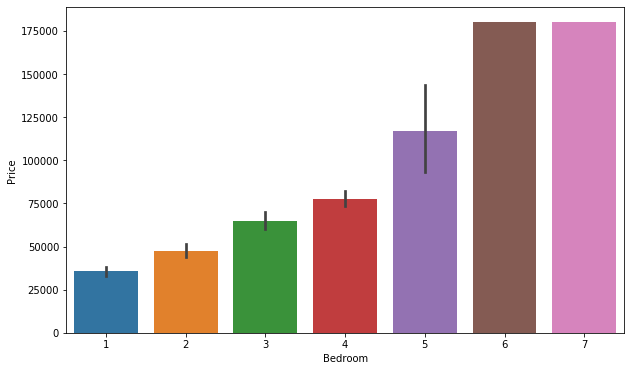

In [7]:
#avg house price along with no of bedrooms
plt.figure(figsize = (10,6))
sns.barplot(x = data.Bedroom, y = data.Price)

In [8]:
data.groupby(['Bedroom']).Price.agg([len, min,max])

,len,min,max
Bedroom,,,
1,69,13000,67000
2,161,11900,250000
3,239,6100,225000
4,161,30000,160000
5,13,55000,206000
6,1,180000,180000
7,1,180000,180000


The following are the observations..
1. There is clearly a relationship between the House prices and the number of bedrooms. however, there is no difference in avg price of houses with 6 or 7 bedrooms.
2. there is a lot of variation in the max prices of houses as they may vary according to the locality.
3. there are only 1 houses with 6 and 7 bedrooms.

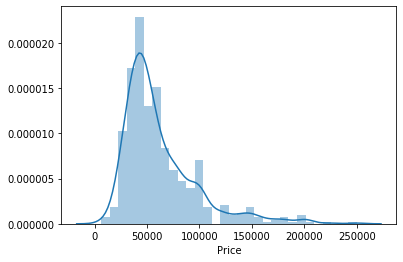

In [9]:
sns.distplot(data.Price)

The Price data is Right skewed and a few outliers are also present such a 2 bedroom house with price $250000.
let's fix this problem.

In [10]:
new_data = data[data.Price < 200000]

In [11]:
new_data.groupby(['Bedroom']).Price.agg([len, min, max])

,len,min,max
Bedroom,,,
1,69,13000,67000
2,160,11900,120000
3,233,6100,185000
4,161,30000,160000
5,12,55000,180000
6,1,180000,180000
7,1,180000,180000


Now, there is one other potential problem with our data. There are too few houses with 6 and 7bedrooms. This is a problem if we want to use the number of bedrooms as a predictor of house price.

To fix this, we can simply group the houses with 6 and 7 bedrooms with the houses featuring 5 bedrooms.

In [12]:
new_data['Bedroom'] = new_data.Bedroom.replace([6,7],5)

C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


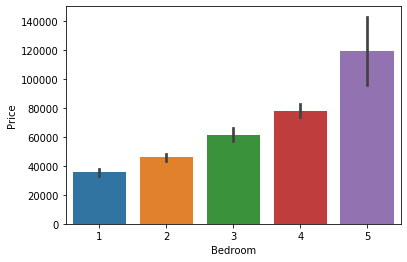

In [13]:
sns.barplot(x = new_data.Bedroom, y = new_data.Price)

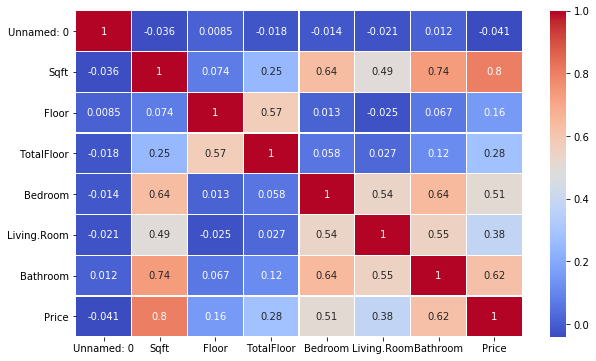

In [14]:
plt.figure(figsize = (10,6))
sns.heatmap(new_data.corr(), annot = True, cmap = 'coolwarm', linewidths=0.25)

In [16]:
X = new_data[['Sqft', 'TotalFloor','Living.Room']]

In [18]:
y = new_data['Price']

In [20]:
# separate y and X into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [26]:
#fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
test_prediction = model.predict(X_test)
train_prediction = model.predict(X_train)

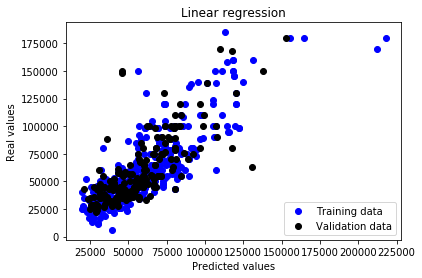

In [34]:
plt.scatter(train_prediction, y_train, c = "blue",  label = "Training data")
plt.scatter(test_prediction, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "lower right")

In [43]:
print("The mean absolute error of our model is ${}.".format(round(mean_absolute_error(y_test, test_prediction))))

The mean absolute error of our model is $13990.0.


In [ ]:
Mean error on the test set is close to $ 14k, which means that the model tends to overestimate the value of houses.